In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Chicago_hotels.csv', sep=';', decimal=',', na_values=' ')
df.head()
df

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65.0,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07
5,June,1994,76.9,126.46,79.3,84.96
6,July,1994,77.5,105.46,77.8,77.22
7,August,1994,75.0,111.59,77.1,79.25
8,September,1994,82.2,117.78,79.1,82.93
9,October,1994,84.7,124.23,79.8,86.49


Text(0, 0.5, 'log10 Average Daily Rate (in $)')

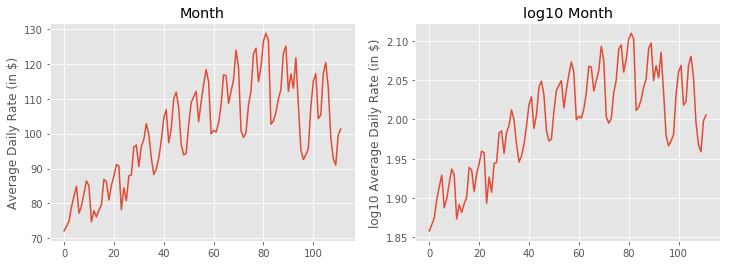

In [4]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['x4'].plot(ax=ax1)
ax1.set_title(u'Month')
ax1.set_ylabel(u'Average Daily Rate (in $)')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['x4'])).plot(ax=ax2)
ax2.set_title(u'log10 Month')
ax2.set_ylabel(u'log10 Average Daily Rate (in $)')

Видно, что ряд меняет свое поведение, тренд меняется с растущего на убывающий, примерно около 80 измерения. Все, что идет до, следует отбросить.
Кажется, что сезонность носит логарифмический характер - разброс значений в течение года увеличивается с каждым годом.

Text(0, 0.5, 'log10 Average Daily Rate (in $)')

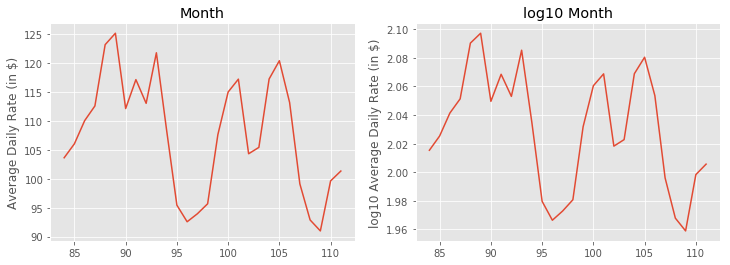

In [5]:
df1 = df[84:][:].drop(columns=["x1", "x2", "x3", "date2"])
df1
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df1['x4'].plot(ax=ax1)
ax1.set_title(u'Month')
ax1.set_ylabel(u'Average Daily Rate (in $)')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df1['x4'])).plot(ax=ax2)
ax2.set_title(u'log10 Month')
ax2.set_ylabel(u'log10 Average Daily Rate (in $)')

В таком виде не очень ясно, является ли сезонность аддитивной или мультипликативной - данных осталось слишком мало для предсказаний :(


In [6]:
df1['month_num'] = range(1, len(df1) + 1)

df1.head()

,date1,x4,month_num
84,January,103.61,1
85,February,106.02,2
86,March,110.01,3
87,April,112.55,4
88,May,123.12,5


In [7]:
df1["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*3
df1["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*3
df1["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*3
df1["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*3
df1["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*3
df1["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*3
df1["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*3
df1["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*3
df1["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*3
df1["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*3
df1["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*3
df1["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*3

df1.head()

,date1,x4,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
84,January,103.61,1,1,0,0,0,0,0,0,0,0,0,0,0
85,February,106.02,2,0,1,0,0,0,0,0,0,0,0,0,0
86,March,110.01,3,0,0,1,0,0,0,0,0,0,0,0,0
87,April,112.55,4,0,0,0,1,0,0,0,0,0,0,0,0
88,May,123.12,5,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
X = df1[:28].drop(columns=["date1", "m03", "x4"])
y = df1['x4'][:28]

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
X

,month_num,m01,m02,m04,m05,m06,m07,m08,m09,m10,m11,m12
84,1,1,0,0,0,0,0,0,0,0,0,0
85,2,0,1,0,0,0,0,0,0,0,0,0
86,3,0,0,0,0,0,0,0,0,0,0,0
87,4,0,0,1,0,0,0,0,0,0,0,0
88,5,0,0,0,1,0,0,0,0,0,0,0
89,6,0,0,0,0,1,0,0,0,0,0,0
90,7,0,0,0,0,0,1,0,0,0,0,0
91,8,0,0,0,0,0,0,1,0,0,0,0
92,9,0,0,0,0,0,0,0,1,0,0,0
93,10,0,0,0,0,0,0,0,0,1,0,0


In [9]:

from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef


regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,107.966146,0.000000
1,month_num,-0.413299,0.000304
2,m01,-6.239931,0.076901
3,m02,-5.193299,0.136975
4,m04,5.806632,0.098034
5,m05,15.615139,0.000339
6,m06,18.123437,0.000056
7,m07,5.606736,0.150806
8,m08,9.065035,0.023921
9,m09,13.333333,0.001547


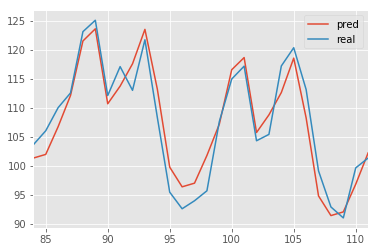

In [10]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [11]:
df_3= pd.DataFrame()

df_3['month_num'] = range(29, 37)

df_3["m01"] = [0,0,0,0,0,0,0,0]
df_3["m02"] = [0,0,0,0,0,0,0,0]
df_3["m04"] = [0,0,0,0,0,0,0,0]
df_3["m05"] = [1,0,0,0,0,0,0,0]
df_3["m06"] = [0,1,0,0,0,0,0,0]
df_3["m07"] = [0,0,1,0,0,0,0,0]
df_3["m08"] = [0,0,0,1,0,0,0,0]
df_3["m09"] = [0,0,0,0,1,0,0,0]
df_3["m10"] = [0,0,0,0,0,1,0,0]
df_3["m11"] = [0,0,0,0,0,0,1,0]
df_3["m12"] = [0,0,0,0,0,0,0,1]

df_3.head()

,month_num,m01,m02,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,29,0,0,0,1,0,0,0,0,0,0,0
1,30,0,0,0,0,1,0,0,0,0,0,0
2,31,0,0,0,0,0,1,0,0,0,0,0
3,32,0,0,0,0,0,0,1,0,0,0,0
4,33,0,0,0,0,0,0,0,1,0,0,0


In [12]:
model.predict(df_3)


array([111.595625, 113.690625, 100.760625, 103.805625, 107.660625,
       113.595625, 103.295625,  89.825625])

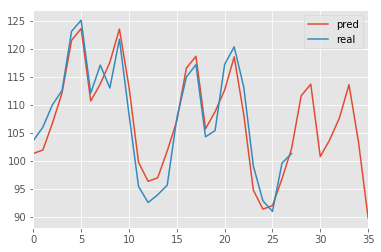

In [13]:
pred1 = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred2 = pd.DataFrame({
    'pred': model.predict(df_3),
    'real': np.nan})
res = pd.concat([pred1, pred2], sort= False).reset_index(drop=True)
res.plot()